In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_excel("D:\Datasets\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df_test=pd.read_excel("D:\Datasets\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
print(df_train.shape)
df_train.head()

(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
print(df_test.shape)
df_test.head()

(2671, 10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
list1=[df_train,df_test]
for i in list1:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
D

in dataset all columns data are object data exept the price column

to check presence of null value

In [5]:
for i in list1:
    print(i.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


to remove null value

In [6]:
df_train=df_train.dropna()
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
df=pd.concat([df_train,df_test],ignore_index=True)
df

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop
...,...,...,...,...,...,...,...,...,...,...,...
13348,No info,Air India,20:25 07 Jun,6/06/2019,20:30,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop
13349,No info,IndiGo,16:55,27/03/2019,14:20,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop
13350,No info,Jet Airways,04:25 07 Mar,6/03/2019,21:50,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop
13351,No info,Air India,19:15,6/03/2019,04:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop


to check presence of null value

In [8]:
df.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 0
Source                0
Total_Stops           0
dtype: int64

In [9]:
col=df.select_dtypes(include=["object"]).columns
for i in col:
    print(i,df[i].unique())
    print("____"*20)

Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
________________________________________________________________________________
Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
________________________________________________________________________________
Arrival_Time ['01:10 22 Mar' '13:15' '04:25 10 Jun' ... '00:20 07 Mar' '00:20 02 Apr'
 '07:45 13 May']
________________________________________________________________________________
Date_of_Journey ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '

Total_Stops,Source,Destination,Airline,Additional_Info have maximum unique values

To convert some object data into a required int formate

In [10]:
df["Additional_Info"].replace('No info','No Info',inplace=True)

Arrival_Time to Arrival_hr ,Arrival_min

In [11]:
df["Arrival_Time"]=df["Arrival_Time"].str.split(" ").str[0]
df["Arrival_hr"]=df["Arrival_Time"].str.split(":").str[0].astype(int)
df["Arrival_min"]=df["Arrival_Time"].str.split(":").str[1].astype(int)

Date of journey to year,month,days

In [12]:
df["year"]=df["Date_of_Journey"].str.split("/").str[2].astype(int)
df["month"]=df["Date_of_Journey"].str.split("/").str[1].astype(int)
df["day"]=df["Date_of_Journey"].str.split("/").str[0].astype(int)

Dep_time to Dep_hr,Dep_min

In [13]:
df["Dep_hr"]=df["Dep_Time"].str.split(":").str[0].astype(int)
df["Dep_min"]=df["Dep_Time"].str.split(":").str[1].astype(int)

Duration to dur_hr,dur_min

In [14]:
df["Dur_min"]=df["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)
df.filter(like="Dur").head()

,Duration,Dur_min
0,2h 50m,170
1,7h 25m,445
2,19h,1140
3,5h 25m,325
4,4h 45m,285


For Route columns

In [15]:
df["Route1"]=df["Route"].str.split("→")
df["Route1"].str.len().max()

6

In [16]:
df["R1"]=df["Route"].str.split("→").str[0]
df["R2"]=df["Route"].str.split("→").str[1]
df["R3"]=df["Route"].str.split("→").str[2]
df["R4"]=df["Route"].str.split("→").str[3]
df["R5"]=df["Route"].str.split("→").str[4]
df["R6"]=df["Route"].str.split("→").str[5]

In [17]:
df.filter(like="R").head()

,Route,Route1,R1,R2,R3,R4,R5,R6
0,BLR → DEL,"[BLR , DEL]",BLR,DEL,NaN,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,"[CCU , IXR , BBI , BLR]",CCU,IXR,BBI,BLR,NaN,NaN
2,DEL → LKO → BOM → COK,"[DEL , LKO , BOM , COK]",DEL,LKO,BOM,COK,NaN,NaN
3,CCU → NAG → BLR,"[CCU , NAG , BLR]",CCU,NAG,BLR,NaN,NaN,NaN
4,BLR → NAG → DEL,"[BLR , NAG , DEL]",BLR,NAG,DEL,NaN,NaN,NaN


In [18]:
df.drop(columns=["Route","Route1","Duration","Dep_Time","Date_of_Journey","Arrival_Time"],inplace=True)

In [19]:
df

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Arrival_hr,Arrival_min,year,month,day,Dep_hr,Dep_min,Dur_min,R1,R2,R3,R4,R5,R6
0,No Info,IndiGo,New Delhi,3897.0,Banglore,non-stop,1,10,2019,3,24,22,20,170,BLR,DEL,NaN,NaN,NaN,NaN
1,No Info,Air India,Banglore,7662.0,Kolkata,2 stops,13,15,2019,5,1,5,50,445,CCU,IXR,BBI,BLR,NaN,NaN
2,No Info,Jet Airways,Cochin,13882.0,Delhi,2 stops,4,25,2019,6,9,9,25,1140,DEL,LKO,BOM,COK,NaN,NaN
3,No Info,IndiGo,Banglore,6218.0,Kolkata,1 stop,23,30,2019,5,12,18,5,325,CCU,NAG,BLR,NaN,NaN,NaN
4,No Info,IndiGo,New Delhi,13302.0,Banglore,1 stop,21,35,2019,3,1,16,50,285,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13348,No Info,Air India,Banglore,NaN,Kolkata,1 stop,20,25,2019,6,6,20,30,1435,CCU,DEL,BLR,NaN,NaN,NaN
13349,No Info,IndiGo,Banglore,NaN,Kolkata,non-stop,16,55,2019,3,27,14,20,155,CCU,BLR,NaN,NaN,NaN,NaN
13350,No Info,Jet Airways,Cochin,NaN,Delhi,1 stop,4,25,2019,3,6,21,50,395,DEL,BOM,COK,NaN,NaN,NaN
13351,No Info,Air India,Cochin,NaN,Delhi,1 stop,19,15,2019,3,6,4,0,915,DEL,BOM,COK,NaN,NaN,NaN


In [20]:
df.isnull().sum()

Additional_Info        0
Airline                0
Destination            0
Price               2671
Source                 0
Total_Stops            0
Arrival_hr             0
Arrival_min            0
year                   0
month                  0
day                    0
Dep_hr                 0
Dep_min                0
Dur_min                0
R1                     0
R2                     0
R3                  4340
R4                 11396
R5                 13295
R6                 13351
dtype: int64

modified columns have some nan values

In [21]:
df=df.replace(np.nan,"None")

In [22]:
df.isnull().sum()

Additional_Info    0
Airline            0
Destination        0
Price              0
Source             0
Total_Stops        0
Arrival_hr         0
Arrival_min        0
year               0
month              0
day                0
Dep_hr             0
Dep_min            0
Dur_min            0
R1                 0
R2                 0
R3                 0
R4                 0
R5                 0
R6                 0
dtype: int64

In [23]:
df.dtypes

Additional_Info    object
Airline            object
Destination        object
Price              object
Source             object
Total_Stops        object
Arrival_hr          int32
Arrival_min         int32
year                int32
month               int32
day                 int32
Dep_hr              int32
Dep_min             int32
Dur_min             int64
R1                 object
R2                 object
R3                 object
R4                 object
R5                 object
R6                 object
dtype: object

In [24]:
objects=df.select_dtypes(include=["object"])

In [25]:
objects.head()

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,R1,R2,R3,R4,R5,R6
0,No Info,IndiGo,New Delhi,3897,Banglore,non-stop,BLR,DEL,None,None,None,None
1,No Info,Air India,Banglore,7662,Kolkata,2 stops,CCU,IXR,BBI,BLR,None,None
2,No Info,Jet Airways,Cochin,13882,Delhi,2 stops,DEL,LKO,BOM,COK,None,None
3,No Info,IndiGo,Banglore,6218,Kolkata,1 stop,CCU,NAG,BLR,None,None,None
4,No Info,IndiGo,New Delhi,13302,Banglore,1 stop,BLR,NAG,DEL,None,None,None


Visualization of object data

In [26]:
objects.drop(columns=["Price","R1","R2","R3","R4","R5","R6"],inplace=True)

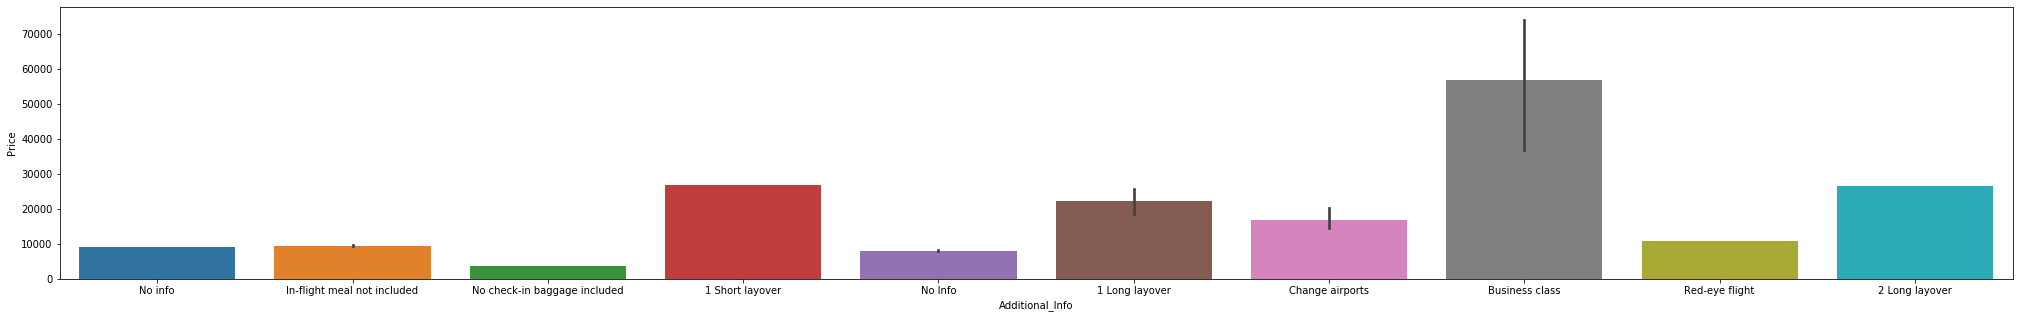

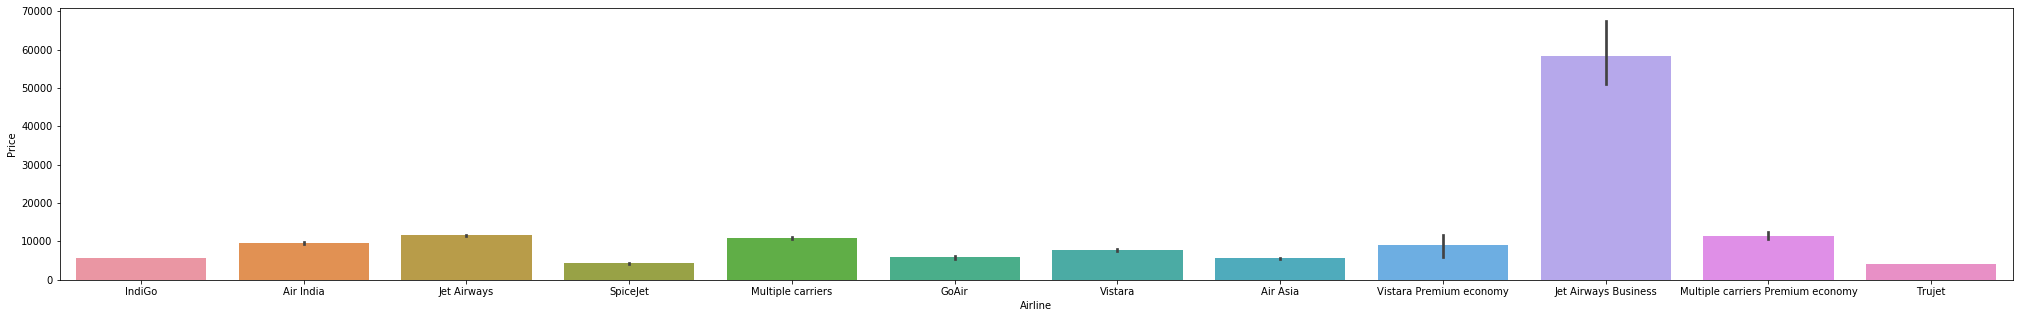

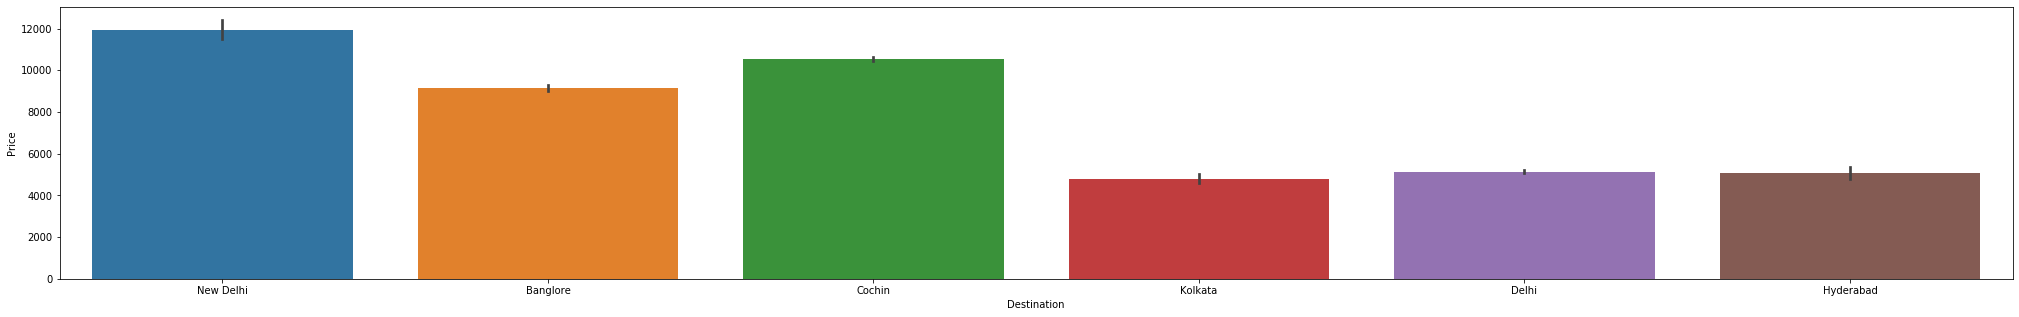

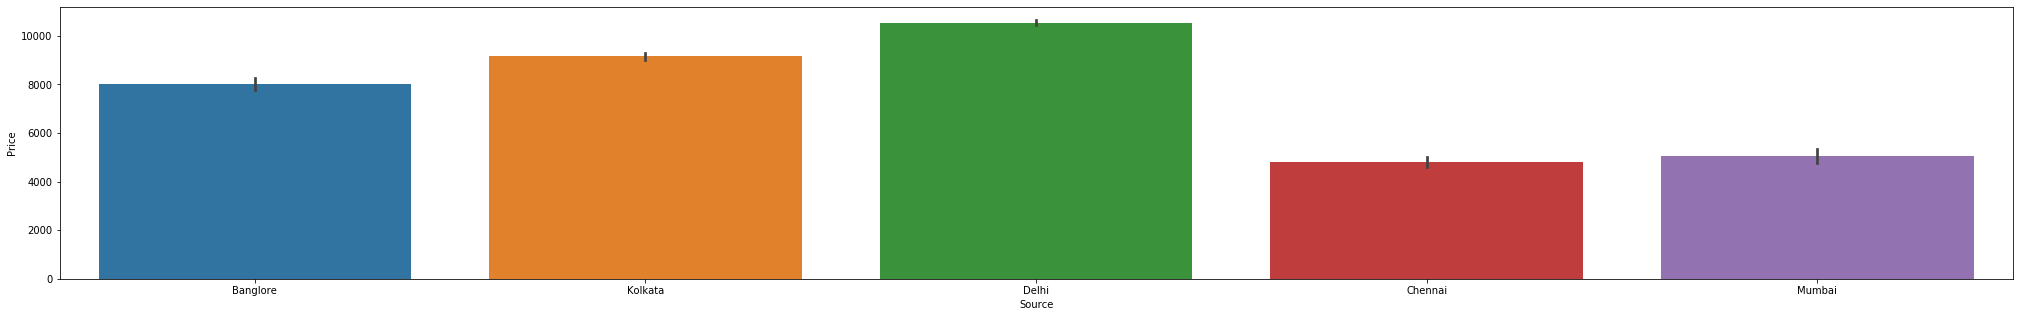

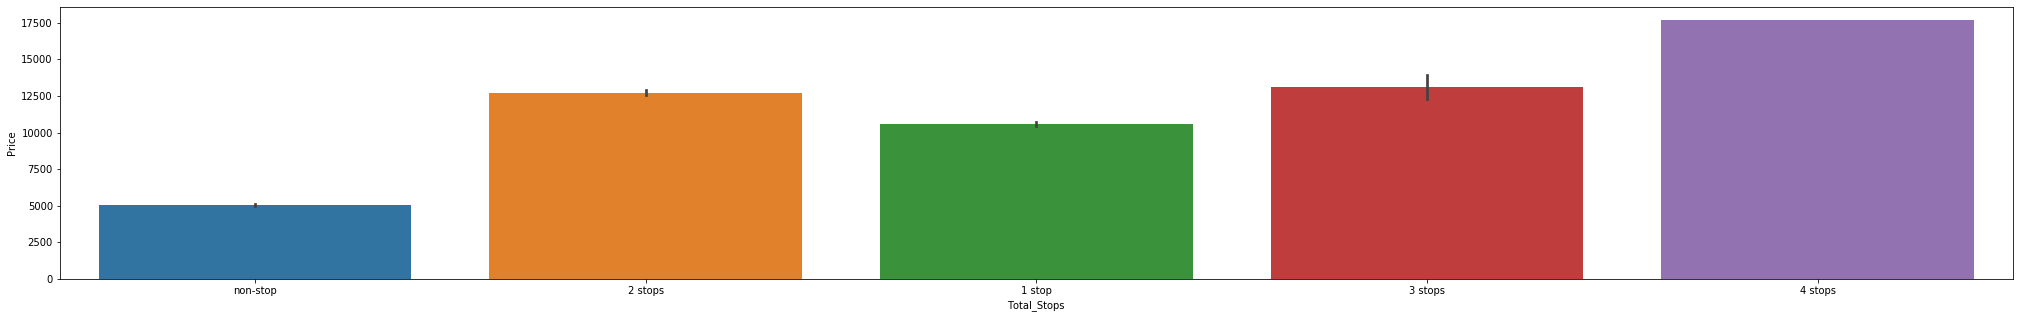

In [27]:
col=objects.columns
for i in col:
    plt.figure(figsize=(35,5))
    sns.barplot(df_train[i],df_train["Price"])
    plt.show()

the above bar graphs shows that

Business Class shows high price in Additional_Info

Jet Airways Business Air line is at high price

Highprice place are New Delhi ,Banglore,Cochin

increase in no of stops leads to incerase in price

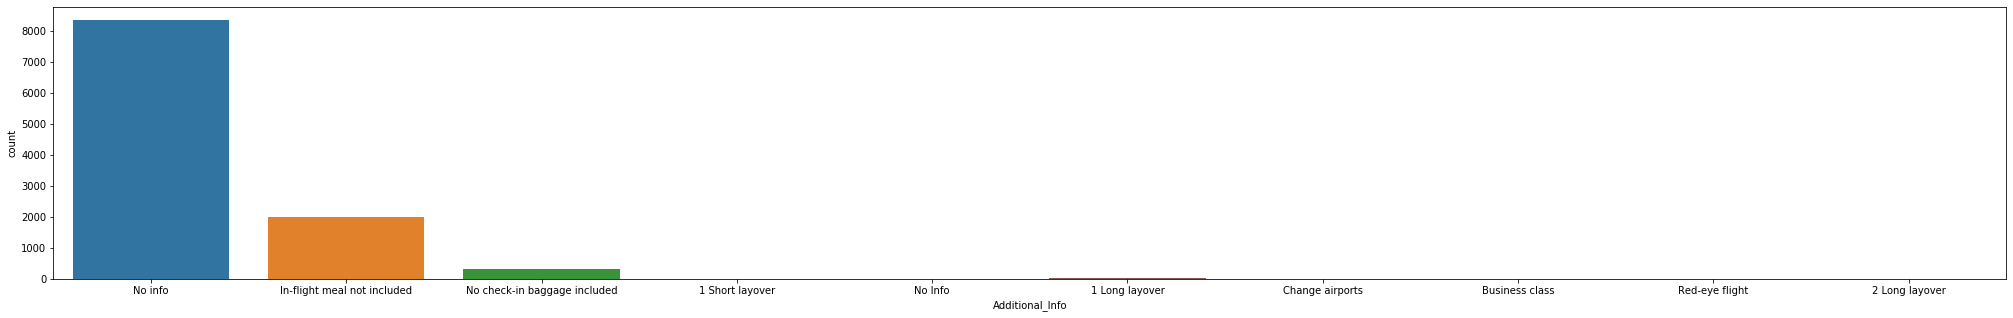

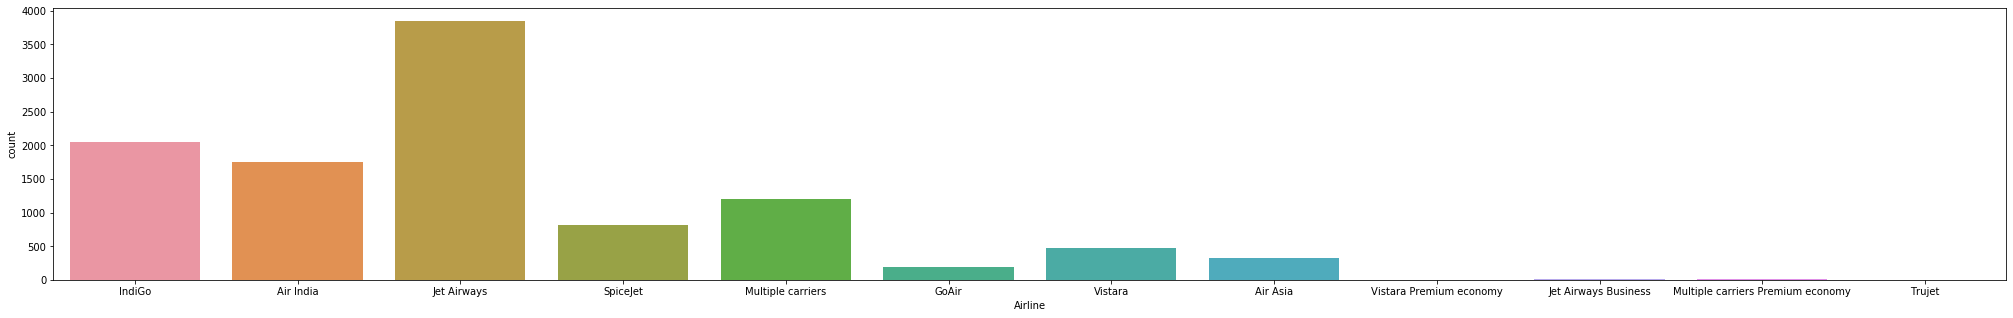

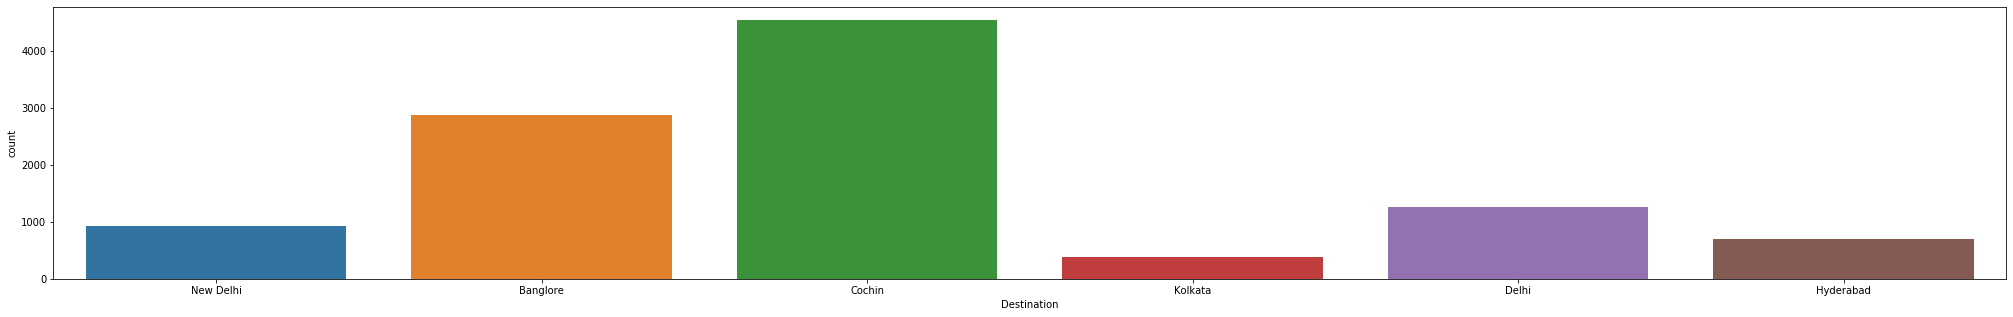

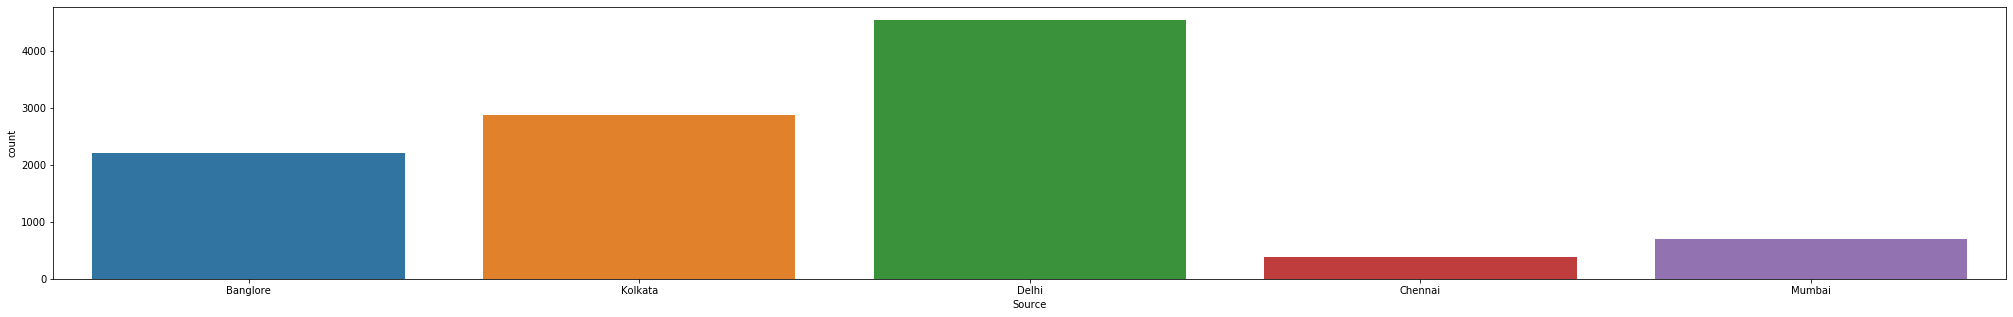

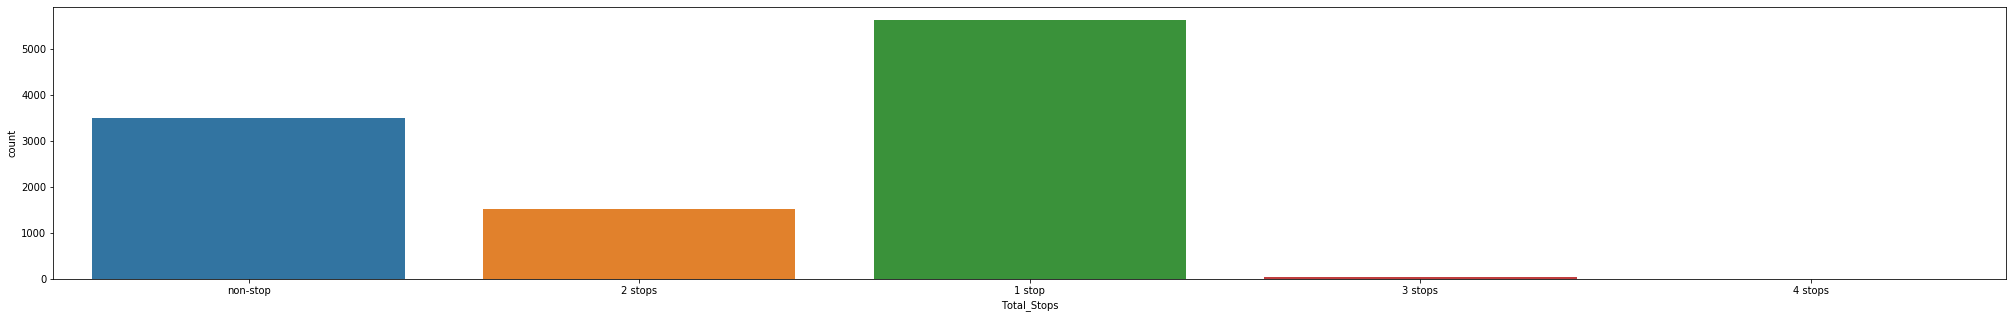

In [28]:
for i in col:
    plt.figure(figsize=(35,5))
    sns.countplot(df_train[i])
    plt.show()

Most of Airline belongs to Jet Airways

High amount of destination booked is Cochin 

Most flights reaches Delhi

Lot of people select 1 stop flight

In [29]:
from sklearn.preprocessing import LabelEncoder
list1=df.select_dtypes(include=["object"]).columns

In [30]:
le=LabelEncoder()

In [31]:
df['Additional_Info']=le.fit_transform(df['Additional_Info'])
df['Airline']=le.fit_transform(df['Airline'])
df['Destination']=le.fit_transform(df['Destination'])
df['Source']=le.fit_transform(df['Source'])
df['Total_Stops']=le.fit_transform(df['Total_Stops'])
df['R1']=le.fit_transform(df['R1'])
df['R2']=le.fit_transform(df['R2'])
df['R3']=le.fit_transform(df['R3'])
df['R4']=le.fit_transform(df['R4'])
df['R5']=le.fit_transform(df['R5'])
df['R6']=le.fit_transform(df['R6'])

In [32]:
df.describe()

,Additional_Info,Airline,Destination,Source,Total_Stops,Arrival_hr,Arrival_min,year,month,day,Dep_hr,Dep_min,Dur_min,R1,R2,R3,R4,R5,R6
count,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.0,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.00000,13353.000000
mean,5.836142,3.977308,1.435483,1.954093,1.451135,13.396390,24.664120,2019.0,4.710552,13.390399,12.513518,24.505729,642.364637,2.015427,11.899199,13.517786,11.791058,4.98285,0.999850
std,0.497558,2.363945,1.473418,1.178652,1.804195,6.896299,16.560343,0.0,1.165662,8.439134,5.736407,18.832255,506.689327,1.205167,7.983160,11.744216,2.951539,0.26661,0.012238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.0,3.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.000000,3.000000,0.000000,2.000000,0.000000,8.000000,10.000000,2019.0,3.000000,6.000000,8.000000,5.000000,175.000000,1.000000,7.000000,4.000000,13.000000,5.00000,1.000000
50%,6.000000,4.000000,1.000000,2.000000,0.000000,14.000000,25.000000,2019.0,5.000000,12.000000,11.000000,25.000000,520.000000,2.000000,7.000000,6.000000,13.000000,5.00000,1.000000
75%,6.000000,4.000000,2.000000,3.000000,4.000000,19.000000,35.000000,2019.0,6.000000,21.000000,18.000000,40.000000,930.000000,3.000000,14.000000,30.000000,13.000000,5.00000,1.000000
max,8.000000,11.000000,5.000000,4.000000,4.000000,23.000000,55.000000,2019.0,6.000000,27.000000,23.000000,55.000000,2860.000000,4.000000,44.000000,30.000000,13.000000,5.00000,1.000000


In [33]:
df.drop(columns="year",inplace=True)

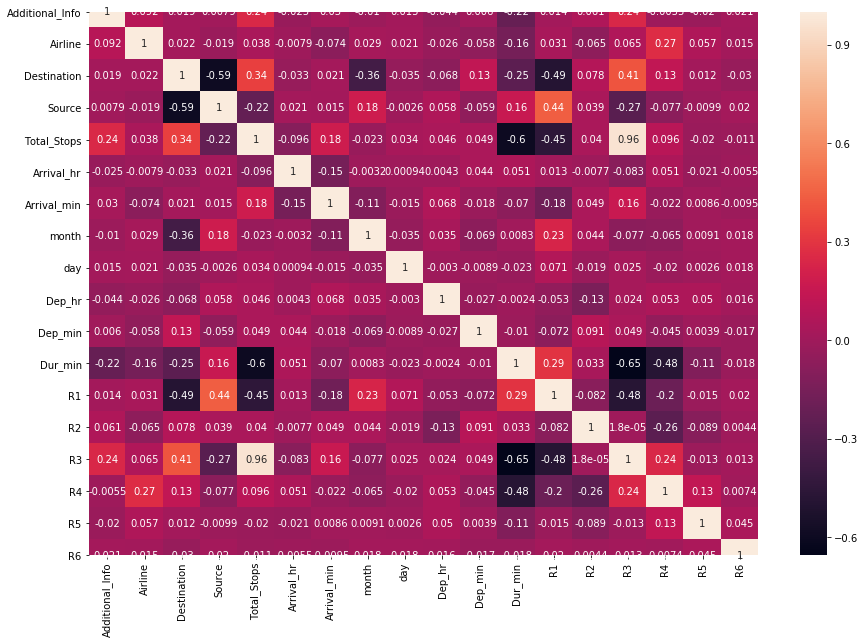

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
X=df.iloc[0:10682,:]
x=X.drop(columns=["Price"])
x.shape

(10682, 18)

In [36]:
y=X["Price"]
y.shape

(10682,)

In [37]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [38]:
def metrics(a,b):
    print("r2_score : ",r2_score(a,b))
    print("mean_squared_error : ",mean_squared_error(a,b))
    print("mean_absolute_error : ",mean_absolute_error(a,b))

In [39]:
def model(mod,x1,y1,x2,y2):
    mod.fit(x1,y1)
    pred=mod.predict(x2)
    metrics(y2,pred)

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=40)

In [41]:
print("cross_val_score : ",cross_val_score(LinearRegression(),x,y,cv=4).mean())
model(LinearRegression(),xtrain,ytrain,xtest,ytest)

cross_val_score :  0.49147799979227036
r2_score :  0.46295686783475476
mean_squared_error :  11992373.454065299
mean_absolute_error :  2365.459571537664


In [42]:
list1=[DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
for i in list1:
    print("cross_val_score : ",cross_val_score(i,x,y,cv=4).mean())
    model(i,xtrain,ytrain,xtest,ytest)

cross_val_score :  0.7835684332399029
r2_score :  0.7913081746725127
mean_squared_error :  4660166.2999532055
mean_absolute_error :  727.0311963812198
cross_val_score :  0.5761347991890922
r2_score :  0.583270734008989
mean_squared_error :  9305719.94627983
mean_absolute_error :  1714.979691155826
cross_val_score :  0.861129644526081
r2_score :  0.8948685594758883
mean_squared_error :  2347624.2800942645
mean_absolute_error :  666.0792880540143
cross_val_score :  0.3327480399885172
r2_score :  0.2818966637596514
mean_squared_error :  16035515.34507789
mean_absolute_error :  3288.6098733076415


Hyper parameter Tuneing

In [43]:
para={"n_estimators": [10,20,30],"max_features" : ["auto", "sqrt", "log2"]}
gv=GridSearchCV(RandomForestRegressor(),para,cv=5)
gv.fit(xtrain,ytrain)
gvpred=gv.predict(xtest)
r2_score(ytest,gvpred)

0.8890815015005493

accuracy increased by .5% tuneing

In [44]:
import joblib
joblib.dump(gvpred,"Flight_price.obj")

['Flight_price.obj']